## このtutorialの目標
- bedファイル(/home/k1_taka/reference/LDSCORE/1000G_Phase3_cell_type_groups)からldscoreを作成
- 作成したldscoreを使用してS-LDSCを実施する
- barplotで図示する

### 準備

cp /home/k1_taka/LDSC/S_LDSC_tutorial/takahashi_arranged_ldscore_eur-v1_20240902_tutorial.sh ~/LDSC/S_LDSC_tutorial4
cp /home/k1_taka/LDSC/S_LDSC_tutorial/takahashi_arranged_sldsc_eur-v1_20240902_tutorial.sh ~/LDSC/S_LDSC_tutorial4

### data_listの作成

##terminalに入力

mkdir -p ~/LDSC/S_LDSC_tutorial4/20241021_tutorial/data/info
cd /home/k1_taka/reference/LDSCORE/1000G_Phase3_cell_type_groups
ls *.bed | sed 's/.bed//g' > ~/LDSC/S_LDSC_tutorial/20240902_tutorial/data/info/data_list

##terminalに入力

qlogin -l s_vmem=10G -l mem_req=10G
export MKL_NUM_THREADS=1
export OMP_NUM_THREADS=1
export MKL_DOMAIN_NUM_THREADS=1
unset PROMPT_COMMAND


wd=~/LDSC/S_LDSC_tutorial4/20240902_tutorial


cd $wd
mkdir -p log



export PATH=/home/k1_taka/miniconda3/envs/ldsc/bin:/home/k1_taka/miniconda3/bin:${PATH}


dd=~/LDSC/S_LDSC_tutorial/20240902_tutorial/data

info=${dd}/info/data_list
num=`wc -l $info |  cut -d " " -f1`



 #MAIN JOB
qsub -pe def_slot 1 \
   -l s_vmem=10G,mem_req=10G \
   -cwd \
   -t 1:${num} -tc 50 \
   -o log/ldscore_test.log \
   -e log/ldscore_test.error \
   takahashi_arranged_ldscore_eur-v1_20240902_tutorial.sh ${dd}
    #Your job-array 105103970.1-10:1 ("takahashi_arranged_ldscore_eur-v1_20240902_tutorial.sh") has been submitted
    #tc 同時実行数を制御





##terminalに入力

qlogin -l s_vmem=10G -l mem_req=10G
export MKL_NUM_THREADS=1
export OMP_NUM_THREADS=1
export MKL_DOMAIN_NUM_THREADS=1
unset PROMPT_COMMAND


wd=~/LDSC/S_LDSC_tutorial/20240902_tutorial


cd $wd
mkdir -p log



export PATH=/home/k1_taka/miniconda3/envs/ldsc/bin:/home/k1_taka/miniconda3/bin:${PATH}


dd=~/LDSC/S_LDSC_tutorial/20240902_tutorial/data

info=${dd}/info/data_list
num=`wc -l $info |  cut -d " " -f1`



 #MAIN JOB
qsub -pe def_slot 1 \
   -l s_vmem=10G,mem_req=10G \
   -cwd \
   -t 1:${num} -tc 50 \
   -o log/sldsc_test.log \
   -e log/sldsc_test.error \
   takahashi_arranged_sldsc_eur-v1_20240902_tutorial.sh ${dd}
    #Your job-array 105108932.1-10:1  ("ldscore_tf_kawakami_eas-v1.sh") has been submitted
    #tc 同時実行数を制御

In [ ]:
表示されたディレクトリの中に、UKB_460K.disease_ALLERGY_ECZEMA_DIAGNOSED.sumstats.gz ファイルが存在していません。したがって、スクリプトがそのファイルを読み込もうとして失敗しています。

解決策としては、以下の手順を試してみてください：

ファイルが本当に必要かどうかの確認： UKB_460K.disease_ALLERGY_ECZEMA_DIAGNOSED.sumstats.gz の代わりに別のファイルを使用する可能性があるか、スクリプトが対応できる他のデータセットがあるかを確認します。例えば、ALKES_LAB ディレクトリ内の関連するファイルを使用できるか検討してみてください。

スクリプトの修正： ファイルが存在しない場合、スクリプト内の該当部分を修正し、代替ファイルに変更するか、処理をスキップするように調整します。

例えば、スクリプトの該当部分を次のように修正できます：

bash
コードをコピーする
# Allergy Eczemaの部分を別のファイルに置き換えるか、スキップするように変更
trait=Other_trait_or_skip
sumstats=/home/k1_taka/reference/gwas_sumstats_ldsc/EUR/ALKES_LAB/other_valid_file.sumstats.gz  # 適切なファイルパスを設定
または、全体の処理においてアレルギー関連の解析をスキップする形にすることも可能です。

新しいファイルを取得する： もし本当にそのファイルが必要ならば、UKB_460K.disease_ALLERGY_ECZEMA_DIAGNOSED.sumstats.gz ファイルを適切な場所にダウンロードし、再度実行してみてください。
いずれの方法で進めるか検討してみてください。

## -log10pのbarplotの作成

In [2]:
##ここからはR

library(ggplot2) 

set.seed(1)
library(fs)
library(data.table)
library(dplyr)
library(tidyverse)

## X: CC毎の比較, y: -log10p, facet: sumstats (noexp)

In [3]:
dir_path="~/LDSC/S_LDSC_tutorial/result/20240902_tutorial/sldsc"
filelist=dir(dir_path)

#modified LDSC (全mark含む)
enrichment_allsumstats_df=data.frame(matrix(rep(NA, 11), ncol=11))[0,]
## このtutorialの目標
- bedファイル(/home/k1_taka/reference/LDSCORE/1000G_Phase3_cell_type_groups)からldscoreを作成
- 作成したldscoreを使用してS-LDSCを実施する
- barplotで図示する
for (file_n in filelist){
    sumstats_list=c("Lupus_langefeld.results", "PASS_Intelligence_SavageJansen2018.results",  "PASS_Height1.results", "PASS_CD_deLange2017.results","PASS_Schizophrenia_Pardinas2018.results",  "PASS_BMI1.results", "RA_ishigaki.results", "PASS_SleepDuration_Dashti2019.results","PASS_Type_2_Diabetes.results")
    for (sumstats in sumstats_list){
        df=read.table(paste0(dir_path, "/", file_n, "/", sumstats), header=1)
        annotation_df=df[1, 2:10]
        
        new_df=data.frame(sumstatsname=sumstats,celltype=file_n, annotation_df)
        enrichment_allsumstats_df=rbind(enrichment_allsumstats_df, new_df)
    }
}



Warning message in file(file, "rt"):
“ ファイル '/home/harita/LDSC/S_LDSC_tutorial/result/20240902_tutorial/sldsc/gene_list_region_hg19_ext100Kbp/Lupus_langefeld.results' を開くことができません: そのようなファイルやディレクトリはありません ”


ERROR: Error in file(file, "rt"):  コネクションを開くことができません 


In [3]:
enrichment_allsumstats_df$minuslog10p=-log10(pnorm(-enrichment_allsumstats_df$Coefficient_z.score,0,1))

In [4]:
out_f="~/LDSC/S_LDSC_tutorial/result/20240902_tutorial/plot"
dir.create(out_f)

In [5]:
metadata=read.table("/home/k1_taka/reference/LDSCORE/1000G_Phase3_cell_type_groups/names", header=1)

In [6]:
head(metadata)

,file_num,cell_type
,<int>,<chr>
1,1,Adrenal_Pancreas.bed
2,2,Cardiovascular.bed
3,3,CNS.bed
4,4,Connective_Bone.bed
5,5,GI.bed
6,6,Hematopoietic.bed


In [7]:
colnames(metadata)=c("celltype", "cell_type")

In [8]:
metadata$celltype=as.character(metadata$celltype)

In [9]:
metadata

celltype,cell_type
<chr>,<chr>
1,Adrenal_Pancreas.bed
2,Cardiovascular.bed
3,CNS.bed
4,Connective_Bone.bed
5,GI.bed
6,Hematopoietic.bed
7,Kidney.bed
8,Liver.bed
9,Other.bed


In [10]:
merge_df=left_join(enrichment_allsumstats_df, metadata, by="celltype")
#metadataのcelltype列は元はint型だったのでcharacter型に変換する

In [11]:
head(merge_df)

,sumstatsname,celltype,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score,minuslog10p,cell_type
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Lupus_langefeld.results,1,0.09275965,0.1703288,0.07650386,1.836238,0.8247536,2.976631e-01,-3.012224e-07,9.604593e-08,-3.1362328,0.0003717704,Adrenal_Pancreas.bed
2,PASS_Intelligence_SavageJansen2018.results,1,0.09275965,0.2628100,0.02484493,2.833237,0.2678420,1.265329e-10,3.126213e-08,1.004525e-08,3.1121294,3.0321174651,Adrenal_Pancreas.bed
3,PASS_Height1.results,1,0.09275965,0.3145953,0.04385108,3.391510,0.4727388,6.418054e-07,1.442975e-08,2.227740e-08,0.6477303,0.5874055848,Adrenal_Pancreas.bed
4,PASS_CD_deLange2017.results,1,0.09275965,0.2852337,0.05298751,3.074977,0.5712345,4.886237e-04,-1.426056e-07,4.995436e-08,-2.8547182,0.0009363712,Adrenal_Pancreas.bed
5,PASS_Schizophrenia_Pardinas2018.results,1,0.09275965,0.2550288,0.02834844,2.749351,0.3056117,2.893677e-08,4.546708e-08,2.894862e-08,1.5706128,1.2355525138,Adrenal_Pancreas.bed
6,PASS_BMI1.results,1,0.09275965,0.2542797,0.03699968,2.741275,0.3988769,3.858653e-05,2.125509e-08,1.247883e-08,1.7032921,1.3540208736,Adrenal_Pancreas.bed


In [12]:
merge_df2=merge_df %>% separate(cell_type, c("cell_type2", ".bed"), sep="\\.")

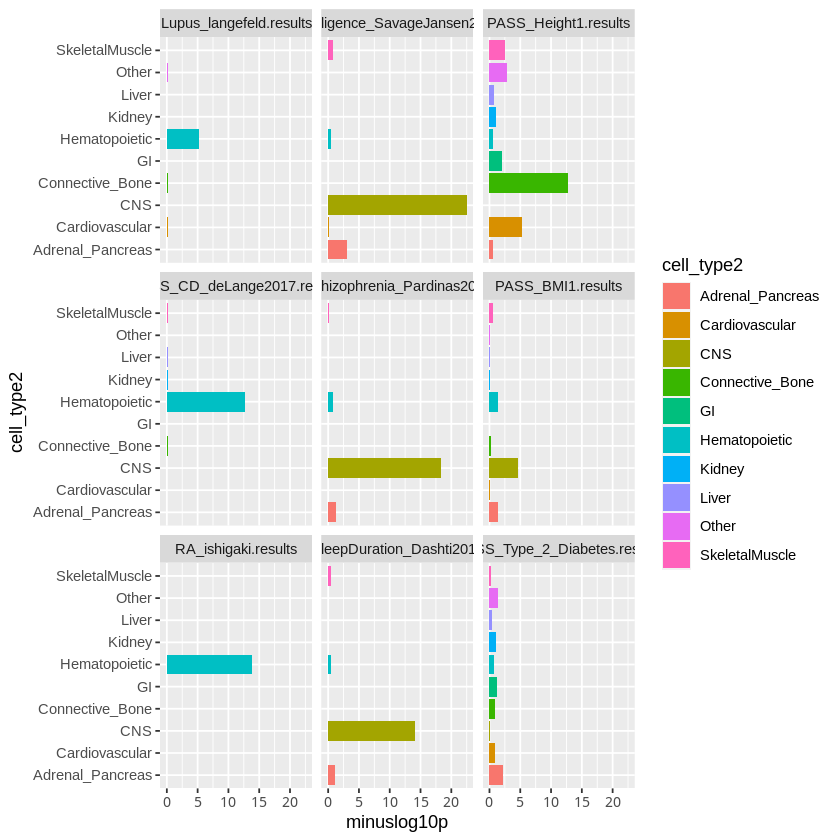

In [13]:
merge_df2$sumstatsname=factor(merge_df2$sumstatsname, levels=sumstats_list)
ggplot(merge_df2, aes(x=minuslog10p,y=cell_type2,fill=cell_type2))+ geom_bar(stat = "identity")+facet_wrap(~sumstatsname)
ggsave(paste0(out_f, "/barplot_minuslog10p_all_sumstats.pdf"), width=10, height=10)

In [ ]:
## このtutorialの目標
- bedファイル(/home/k1_taka/reference/LDSCORE/1000G_Phase3_cell_type_groups)からldscoreを作成
- 作成したldscoreを使用してS-LDSCを実施する
- barplotで図示する

## -log10pのbarplotの作成
##ここからはR

library(ggplot2) 

set.seed(1)
library(fs)
library(data.table)
library(dplyr)
library(tidyverse)

## X: CC毎の比較, y: -log10p, facet: sumstats (noexp)
dir_path="~/LDSC/S_LDSC_tutorial/result/20240902_tutorial/sldsc"
filelist=dir(dir_path)

#modified LDSC (全mark含む)
enrichment_allsumstats_df=data.frame(matrix(rep(NA, 11), ncol=11))[0,]
## このtutorialの目標
- bedファイル(/home/k1_taka/reference/LDSCORE/1000G_Phase3_cell_type_groups)からldscoreを作成
- 作成したldscoreを使用してS-LDSCを実施する
- barplotで図示する
for (file_n in filelist){
    sumstats_list=c("Lupus_langefeld.results", "PASS_Intelligence_SavageJansen2018.results",  "PASS_Height1.results", "PASS_CD_deLange2017.results","PASS_Schizophrenia_Pardinas2018.results",  "PASS_BMI1.results", "RA_ishigaki.results", "PASS_SleepDuration_Dashti2019.results","PASS_Type_2_Diabetes.results")
    for (sumstats in sumstats_list){
        df=read.table(paste0(dir_path, "/", file_n, "/", sumstats), header=1)
        annotation_df=df[1, 2:10]
        
        new_df=data.frame(sumstatsname=sumstats,celltype=file_n, annotation_df)
        enrichment_allsumstats_df=rbind(enrichment_allsumstats_df, new_df)
    }
}

enrichment_allsumstats_df$minuslog10p=-log10(pnorm(-enrichment_allsumstats_df$Coefficient_z.score,0,1))
out_f="~/LDSC/S_LDSC_tutorial/result/20240902_tutorial/plot"
dir.create(out_f)
metadata=read.table("/home/k1_taka/reference/LDSCORE/1000G_Phase3_cell_type_groups/names", header=1)
head(metadata)
colnames(metadata)=c("celltype", "cell_type")
metadata$celltype=as.character(metadata$celltype)
metadata
merge_df=left_join(enrichment_allsumstats_df, metadata, by="celltype")
#metadataのcelltype列は元はint型だったのでcharacter型に変換する
head(merge_df)
merge_df2=merge_df %>% separate(cell_type, c("cell_type2", ".bed"), sep="\\.")

merge_df2$sumstatsname=factor(merge_df2$sumstatsname, levels=sumstats_list)
ggplot(merge_df2, aes(x=minuslog10p,y=cell_type2,fill=cell_type2))+ geom_bar(stat = "identity")+facet_wrap(~sumstatsname)
ggsave(paste0(out_f, "/barplot_minuslog10p_all_sumstats.pdf"), width=10, height=10)

In [14]:
##元データでも今回作成したldscoreと20240729の出来合いのldscoreが同じであることを確認する
##terminalに打ち込む
less ~/LDSC/S_LDSC_tutorial/result/20240902_tutorial/1/1.1.l2.ldscore.gz

CHR     SNP     BP      L2
1       rs3094315       752566  37.919
1       rs3131972       752721  38.001
1       rs3131969       754182  43.247
1       rs1048488       760912  37.857
1       rs3115850       761147  37.720
1       rs2286139       761732  43.106
1       rs12562034      768448  4.962
1       rs4040617       779322  40.259
1       rs2980300       785989  42.470
1       rs2519031       793947  5.974
1       rs4970383       838555  28.355
1       rs4475691       846808  36.138
1       rs1806509       853954  27.945
1       rs7537756       854250  37.235
1       rs13302982      861808  22.176
1       rs4040604       863124  22.176
1       rs28576697      870645  21.796
1       rs1110052       873558  23.650
1       rs7523549       879317  12.524
1       rs3748592       880238  18.823
1       rs3748593       880390  13.293
1       rs2272756       882033  19.722
1       rs2340582       882803  18.823
1       rs4246503       884815  18.823
1       rs3748594       886384  13.017
1       rs17160698      887162  29.009


less ~/reference/LDSCORE/1000G_Phase3_cell_type_groups/cell_type_group.1.1.l2.ldscore.gz

CHR     SNP     BP      L2
1       rs3094315       752566  37.919
1       rs3131972       752721  38.001
1       rs3131969       754182  43.245
1       rs1048488       760912  37.857
1       rs3115850       761147  37.721
1       rs2286139       761732  43.104
1       rs12562034      768448  4.962
1       rs4040617       779322  40.257
1       rs2980300       785989  42.468
1       rs2519031       793947  5.971
1       rs4970383       838555  28.363
1       rs4475691       846808  36.141
1       rs1806509       853954  27.944
1       rs7537756       854250  37.238
1       rs13302982      861808  22.173
1       rs4040604       863124  22.173
1       rs28576697      870645  21.793
1       rs1110052       873558  23.647
1       rs7523549       879317  12.523
1       rs3748592       880238  18.820
1       rs3748593       880390  13.292
1       rs2272756       882033  19.720
1       rs2340582       882803  18.820
1       rs4246503       884815  18.820
1       rs3748594       886384  13.016
1       rs17160698      887162  29.005
1       rs3748595       887560  18.905
1       rs3748597       888659  18.782



#下一桁が違うことがあるが概ね同じ

ERROR: Error in parse(text = x, srcfile = src): <text>:3:7:  予想外の '/' です 
2: ##terminalに打ち込む
3: less ~/
         ^
